##### `NIT Colleges Opening/Closing Ranks EDA`

#### Steps in EDA
	1. Data Ingestion
	2. Perform basic data quality checks
		Missing Value treatment
	3. Perform descriptive statistics
	4. Data Visualization
		Univariate - Single column visualization
			categorical features - Countplot
			continuous features - histogram
		Bivariate - two columns
			continuous vs continuous -> scatterplot, regplot
			categorical vs con -> boxplot
			categorical vs categorical -> crosstab heatmap
		Multivariate - multiple columns
			correlation plot
			pairplot

In [65]:
# Step-1: Data Ingestion
import pandas as pd

df = pd.read_csv('nit-colleges-open-close-ranks-2025.csv')
df.head(1)

,Institute,Academic Program Short Name,Academic Program Name,Quota,Seat Type,Gender,Opening Rank,Closing Rank
0,Dr. B R Ambedkar National Institute of Technol...,Bio Technology,"Bio Technology (4 Years, Bachelor of Technology)",HS,OPEN,Gender-Neutral,58341,79511


In [66]:
# Step-2: Data Sanity - Check for duplicates, null
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print("Duplicates Exist.")
    df.drop_duplicates(keep='first').reset_index(drop=True)
    print('Duplicates Removed.')
else:
    print('Duplicates does not exist')

nulls = df.isna().sum()
nulls_cnt = nulls[nulls > 0].sum()
if nulls_cnt > 0:
    print("Nulls does not exist")
else:
    print('Nulls does not exist')

Duplicates does not exist
Nulls does not exist


In [67]:
cat = list(df.columns[df.dtypes == "object"])
cat

['Institute',
 'Academic Program Short Name',
 'Academic Program Name',
 'Quota',
 'Seat Type',
 'Gender']

In [68]:
con = list(df.columns[df.dtypes != "object"])
con

['Opening Rank', 'Closing Rank']

In [69]:
def replacer(df: pd.DataFrame):
    cat = list(df.columns[df.dtypes == "object"])    
    for col in df.columns:        
        if col in cat:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            mean = df[col].mean()
            df[col] = df[col].fillna(mean)
    print("Missing values replaced")

replacer(df)

Missing values replaced


In [70]:
# Step-3: Perform descriptive statistics
cat, con

(['Institute',
  'Academic Program Short Name',
  'Academic Program Name',
  'Quota',
  'Seat Type',
  'Gender'],
 ['Opening Rank', 'Closing Rank'])

In [71]:
df[con].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Opening Rank,6255.0,15868.60,43168.03,2.0,1935.5,5770.0,15199.5,1002085.0
Closing Rank,6255.0,19322.52,53425.01,6.0,2253.5,6625.0,18051.5,1314967.0


In [72]:
df[cat].describe().T

,count,unique,top,freq
Institute,6255,32,"National Institute of Technology, Rourkela",402
Academic Program Short Name,6255,83,Computer Science and Engineering,741
Academic Program Name,6255,86,"Computer Science and Engineering (4 Years, Bac...",741
Quota,6255,5,OS,3312
Seat Type,6255,10,OPEN,1278
Gender,6255,2,Gender-Neutral,3769


Academic Program Short Name
Computer Science and Engineering                              741
Electronics and Communication Engineering                     668
Mechanical Engineering                                        661
Civil Engineering                                             638
Electrical Engineering                                        438
                                                             ... 
Computational Mathematics(M.Tech.)                              8
Ceramic Engineering and M.Tech Industrial Ceramic(M.Tech.)      8
Engineering Physics(M.Tech.)                                    7
Biotechnology(M.Tech.)                                          6
Chemical Science and Technology                                 4
Name: count, Length: 83, dtype: int64


<Axes: xlabel='Academic Program Short Name'>

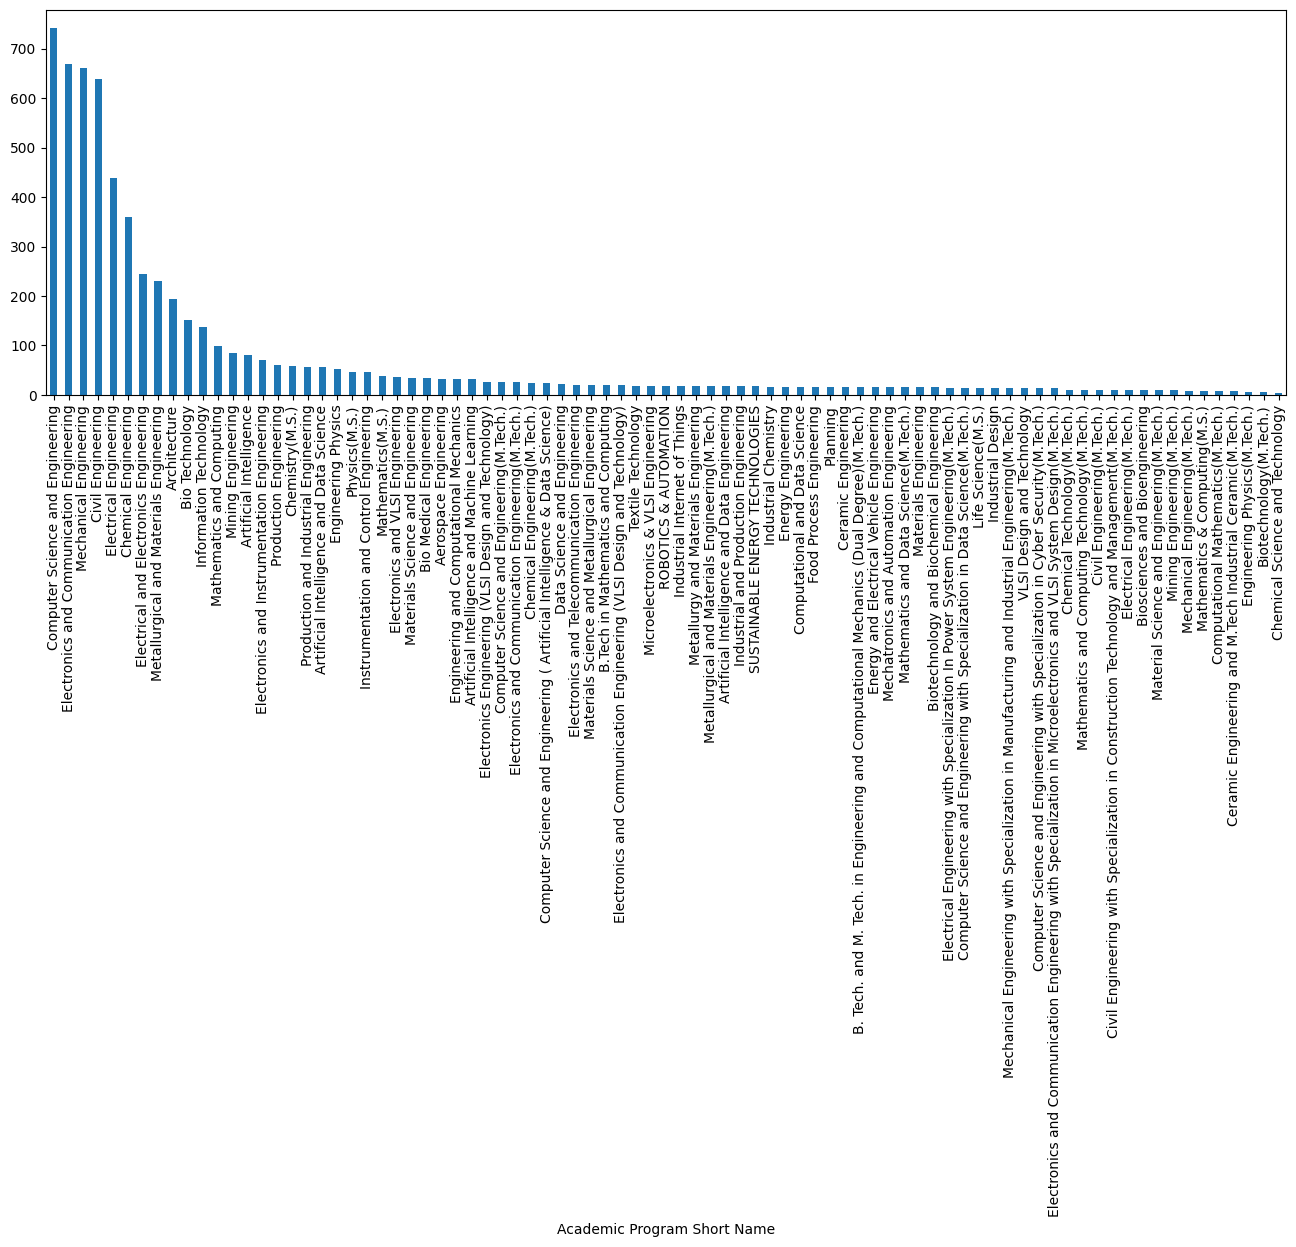

In [73]:
print(df['Academic Program Short Name'].value_counts())
df['Academic Program Short Name'].value_counts().plot(kind='bar', figsize=(16,5))

In [74]:
df['Seat Type'].value_counts()

Seat Type
OPEN             1278
OBC-NCL          1168
SC               1112
EWS               960
ST                951
OPEN (PwD)        383
OBC-NCL (PwD)     235
SC (PwD)           76
EWS (PwD)          68
ST (PwD)           24
Name: count, dtype: int64

In [75]:
df['Gender'].value_counts()

Gender
Gender-Neutral                           3769
Female-only (including Supernumerary)    2486
Name: count, dtype: int64

In [76]:
df['Institute'].value_counts()

Institute
National Institute of Technology, Rourkela                         402
National Institute of Technology, Kurukshetra                      351
National Institute of Technology, Warangal                         319
National Institute of Technology Patna                             314
Sardar Vallabhbhai National Institute of Technology, Surat         293
Dr. B R Ambedkar National Institute of Technology, Jalandhar       284
National Institute of Technology Calicut                           269
National Institute of Technology Raipur                            257
Maulana Azad National Institute of Technology Bhopal               256
National Institute of Technology Karnataka, Surathkal              250
National Institute of Technology Hamirpur                          243
National Institute of Technology, Tiruchirappalli                  240
National Institute of Technology Durgapur                          233
Motilal Nehru National Institute of Technology Allahabad           

In [77]:
# Step-4: Data Visualization
    # 1.Univariate - Single column visulization
    # 2.Bivariate - two column
    # 3.Multivariate - multiple columns
import matplotlib.pyplot as plt
import seaborn as sns

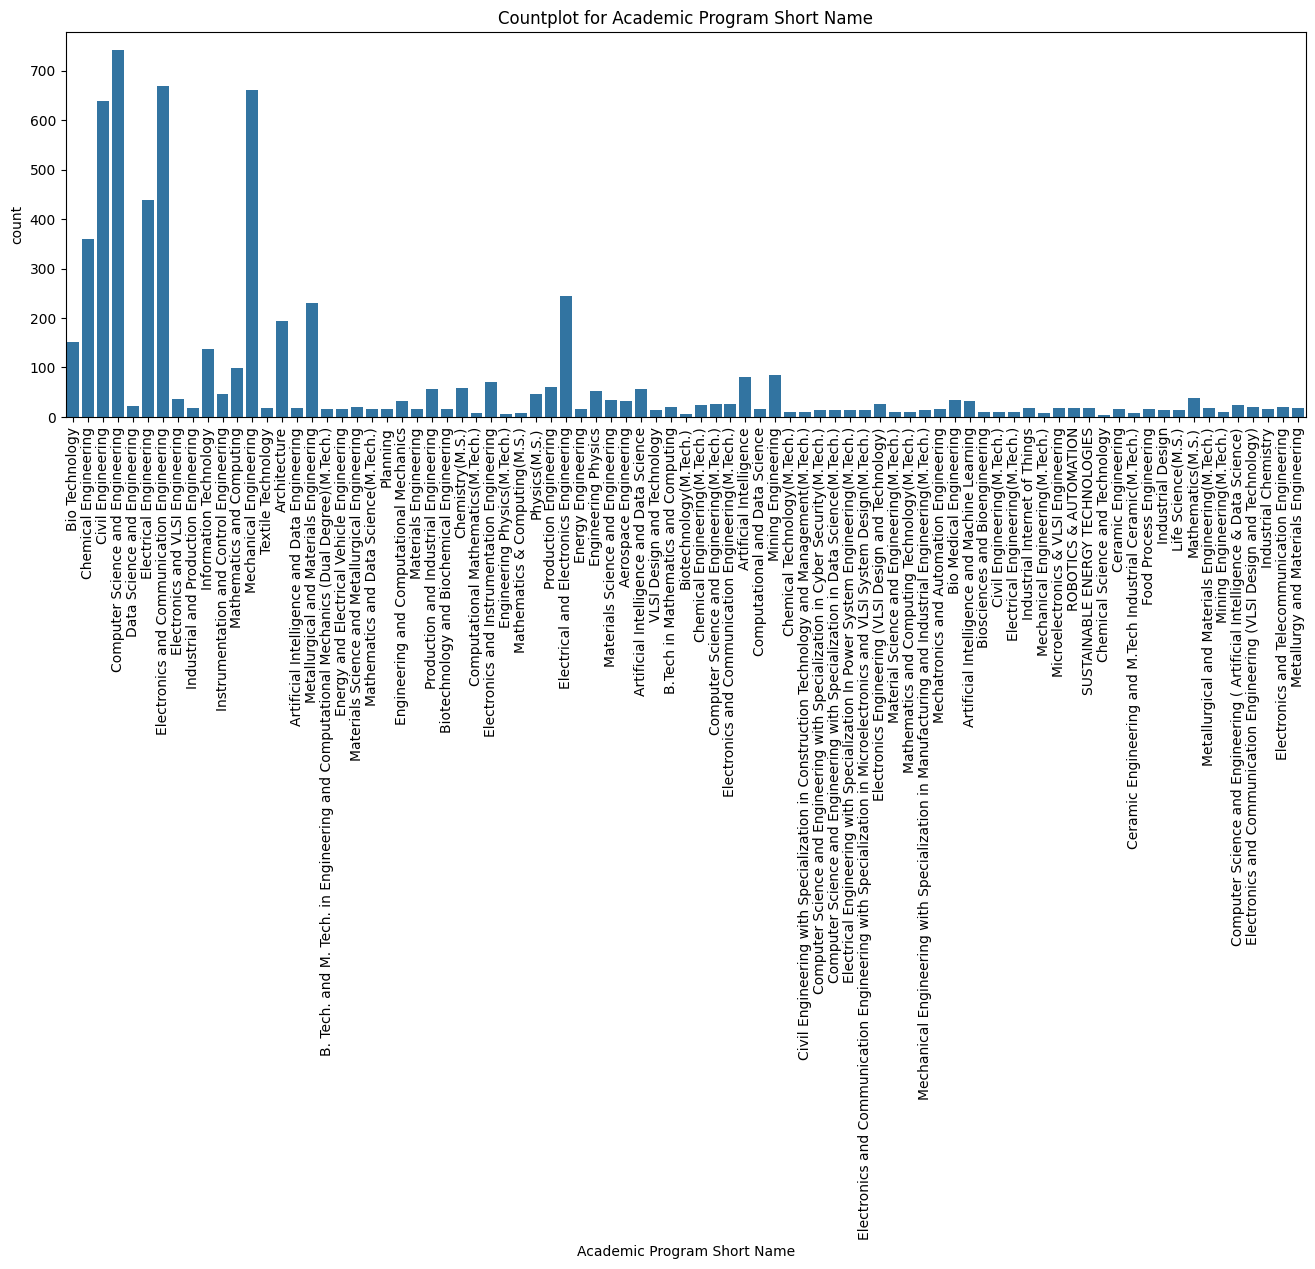

In [78]:
# Univariate analysis
    # 1. categorical features - Countplot
    # 2. continuous features - histogram

plt.figure(figsize=(16, 5)) # Set figure size (width, height)
sns.countplot(data=df, x="Academic Program Short Name") # Plot Graph
plt.title("Countplot for Academic Program Short Name") # Add Title
plt.xticks(rotation=90)
plt.show()

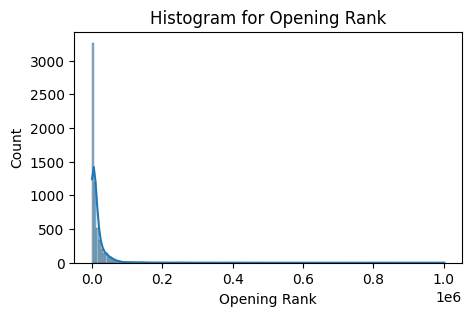

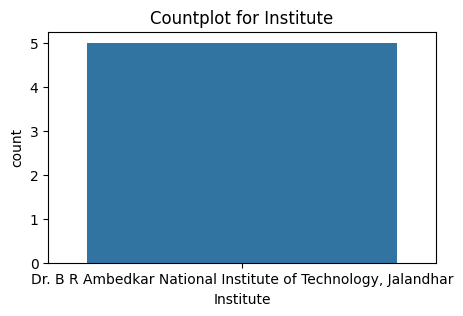

In [79]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot for {col}')
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()


for col in con:
    plot_histogram(df, col)
    break # Just breaking for one column

for col in cat:
    plot_count(df.head(5), col)
    break # Just breaking for one column

In [61]:
# Bivariate Analysis
    # Analyze two variables at a time
        # 1.continuous vs continuous -> scatterplot, regplot
        # 2.categorical vs continuous -> boxplot
        # 3.categorical vs categorical -> crosstab heatmap

# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y}")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y}")
    plt.show()

def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y}")
    plt.show()

con, cat

(['Opening Rank', 'Closing Rank'],
 ['Institute',
  'Academic Program Short Name',
  'Academic Program Name',
  'Quota',
  'Seat Type',
  'Gender'])

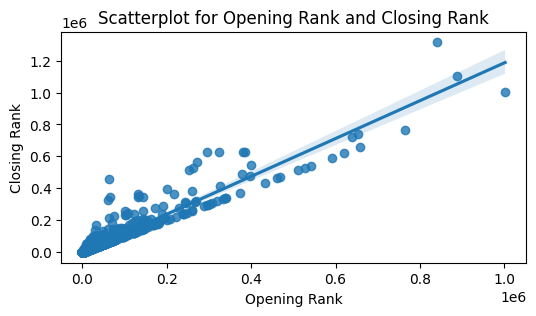

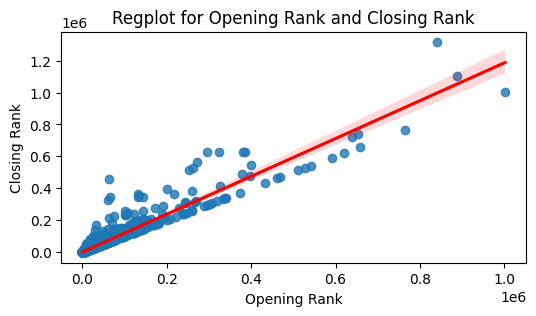

In [80]:
# 1.continuous vs continuous -> scatterplot, regplot
plot_scatter(df, 'Opening Rank', 'Closing Rank')
plot_reg(df, 'Opening Rank', 'Closing Rank')

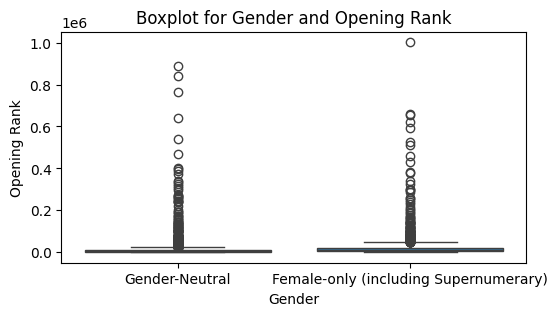

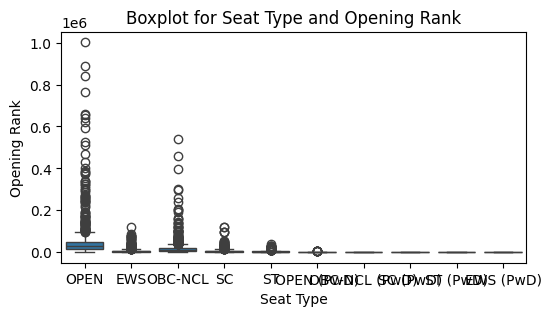

In [63]:
# 2. categorical vs continuous -> boxplot
plot_box(df, 'Gender', 'Opening Rank')
plot_box(df, 'Seat Type', 'Opening Rank')

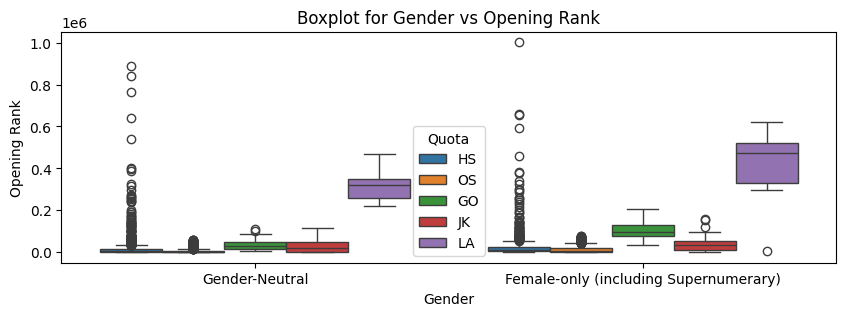

In [81]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Gender", y="Opening Rank", hue="Quota")
plt.title("Boxplot for Gender vs Opening Rank")
plt.show()

In [82]:
unique = df[cat].nunique()
unique

Institute                      32
Academic Program Short Name    83
Academic Program Name          86
Quota                           5
Seat Type                      10
Gender                          2
dtype: int64

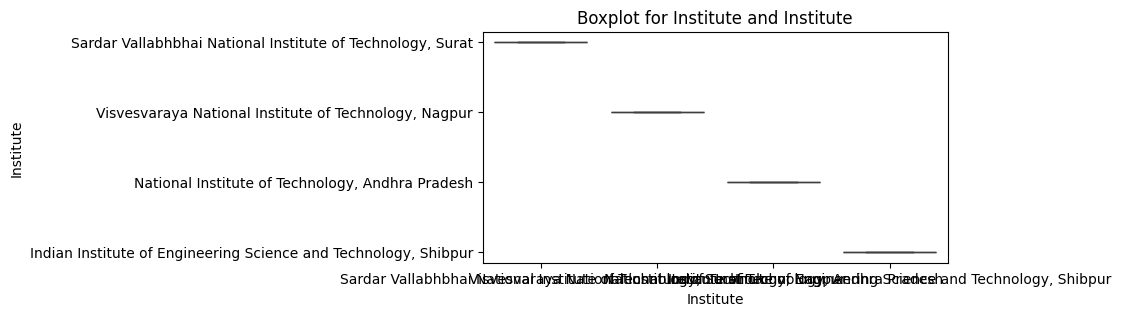

In [88]:
for col in cat:
    plot_box(df.tail(700), col, 'Institute')
    break

In [89]:
# 3. categorical vs categoric > Crosstab heatmap

def crosstab_heatmap(df: pd.DataFrame, cat_col1: str, cat_col2: str):
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    sns.heatmap(ctab, annot=True, fmt="d")
    plt.title(f"Crosstab Heatmap for {cat_col1} vs {cat_col2}")
    plt.show()

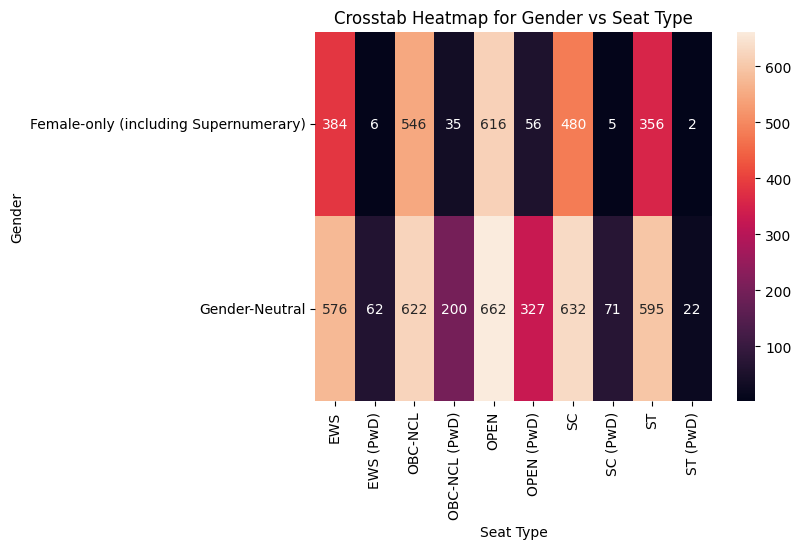

In [91]:
crosstab_heatmap(df, 'Gender', 'Seat Type')

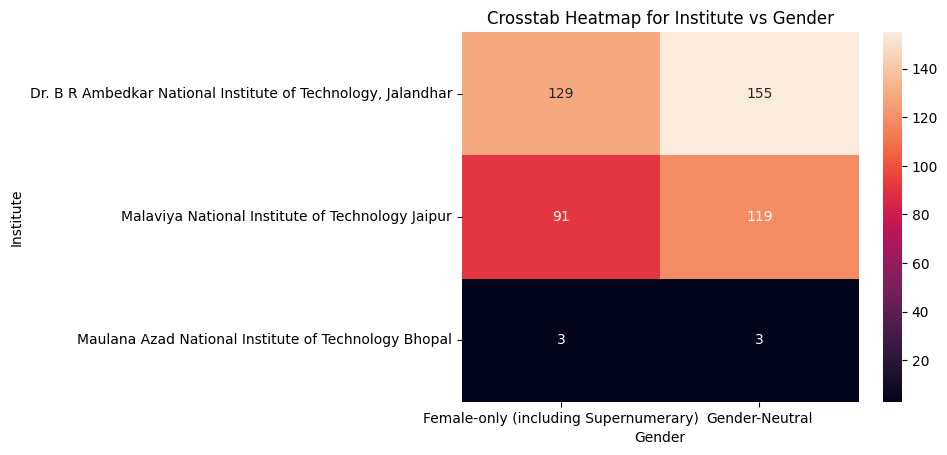

In [93]:
crosstab_heatmap(df.head(500), 'Institute', 'Gender',)

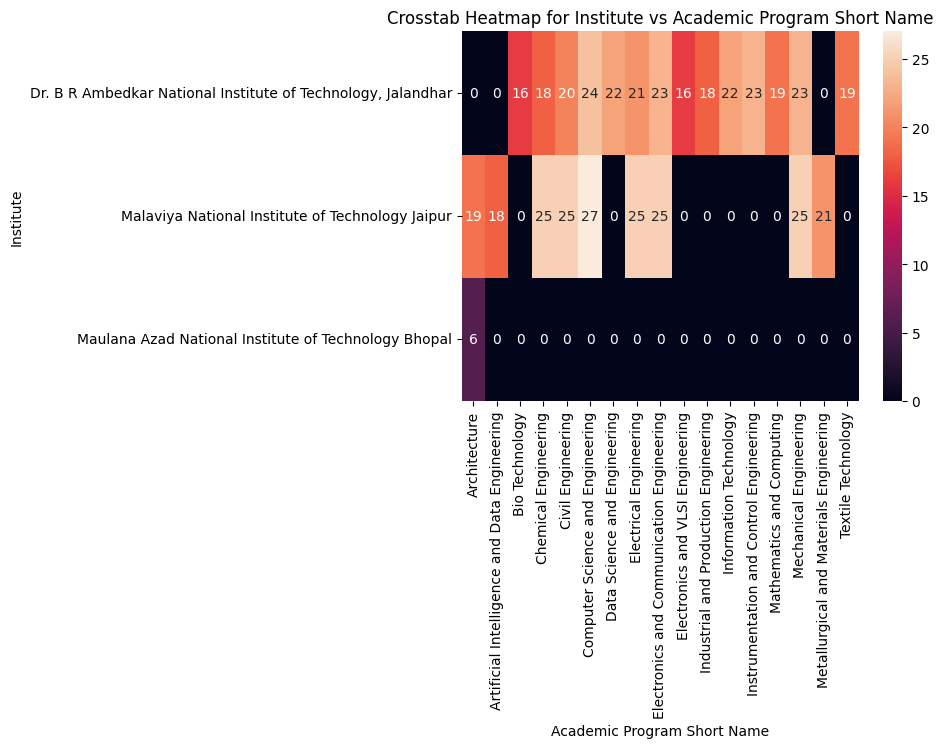

In [94]:
crosstab_heatmap(df.head(500), 'Institute', 'Academic Program Short Name',)

In [95]:
# Multivariate analysis
    # 1.correlation plot
    # 2.pairplot

corr = df.corr(numeric_only=True)
corr

,Opening Rank,Closing Rank
Opening Rank,1.000000,0.957513
Closing Rank,0.957513,1.000000


In [96]:
corr.loc["Opening Rank", "Closing Rank"]

np.float64(0.9575132578249941)

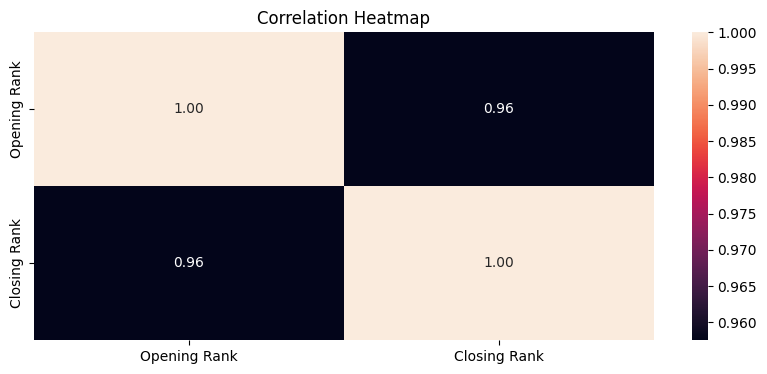

In [97]:
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

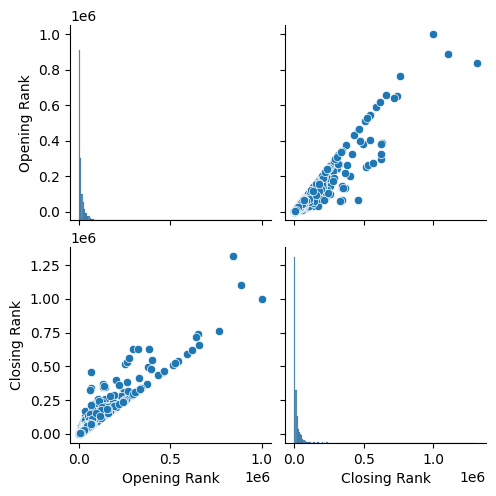

In [98]:
# Pair Plot
sns.pairplot(df[con])

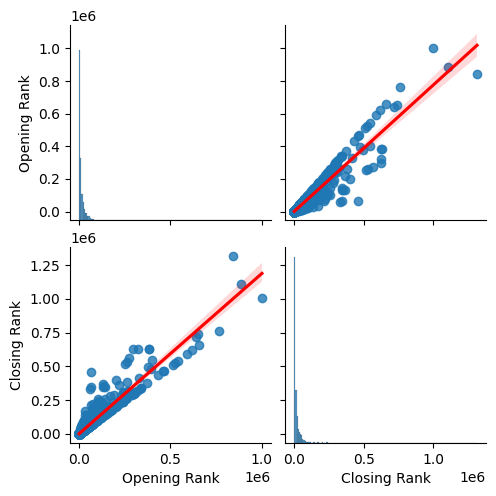

In [99]:
sns.pairplot(df[con], kind="reg", plot_kws = {"line_kws": {"color": "red"}})